In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [138]:
df=pd.read_csv('cleaned_data1.csv')
df.head()

,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,87.80,84.00,1,B.Tech/B.E.,EIE,73.82,650,665,810,0.694479,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,645000
1,57.00,64.50,2,B.Tech/B.E.,CS/IT,65.00,440,435,210,0.342315,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,310000
2,77.33,85.17,2,B.Tech/B.E.,ECE,61.94,485,475,505,0.824666,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,455000
3,84.30,86.00,1,B.Tech/B.E.,CS/IT,80.40,675,620,635,0.990009,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,620000
4,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,0.278457,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,400000


In [139]:
df.columns

Index(['10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

In [140]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.Degree = le.fit_transform(df.Degree)
df.Specialization = le.fit_transform(df.Specialization)

df.head()

,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,87.80,84.00,1,0,3,73.82,650,665,810,0.694479,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,645000
1,57.00,64.50,2,0,0,65.00,440,435,210,0.342315,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,310000
2,77.33,85.17,2,0,1,61.94,485,475,505,0.824666,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,455000
3,84.30,86.00,1,0,0,80.40,675,620,635,0.990009,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,620000
4,82.00,75.00,2,0,5,64.30,575,495,365,0.278457,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,400000


In [141]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [142]:
x= df.drop(columns=['Salary'])
y = df['Salary']
sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15,)

### 1 - Linear Regression

In [143]:
linr=LinearRegression()
linr.fit(x_train,y_train)
y_pred_lr=linr.predict(x_test)
linr_score=r2_score(y_test,y_pred_lr)
print("R2 score of Linear Regression is ",round(linr_score,3)," or ",round(linr_score,2)*100,"%")

R2 score of Linear Regression is  0.22  or  22.0 %


In [144]:
# now calculating rmse of linear regression
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("RMSE of Linear Regression is ",rmse)

RMSE of Linear Regression is  153893.90578729843


### 2 - XGBoost regressor

In [145]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
xgb_score=r2_score(y_test,y_pred_xgb)
print("R2 score of XGBoost is ",round(xgb_score,3)," or ",round(xgb_score,3)*100,"%")

R2 score of XGBoost is  0.13  or  13.0 %


In [146]:
# now calculating rmse of xgboost
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("RMSE of XGBoost is ",rmse)

RMSE of XGBoost is  162566.91512244244


### In our case, linear regression is much better than XGBoost by a huge margin
### 3 - Decision Tree

In [147]:
# implementing decision tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
dt_score=r2_score(y_test,y_pred_dt)
print("R2 score of Decision Tree is ",round(dt_score,3)," or ",round(dt_score,3)*100,"%")
# calculating rmse of decision tree
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("RMSE of Decision Tree is ",rmse)


R2 score of Decision Tree is  -1.251  or  -125.1 %
RMSE of Decision Tree is  261424.14451104804


#### A negative R^2 score indicates that the decision tree regressor is going against the training data set trends
#### Decision tree regressor after putting limit on depth:

R2 score of Decision Tree with max_depth=5 is  0.108  or  10.8 %
RMSE of Decision Tree with max_depth=5 is  164548.81868496365


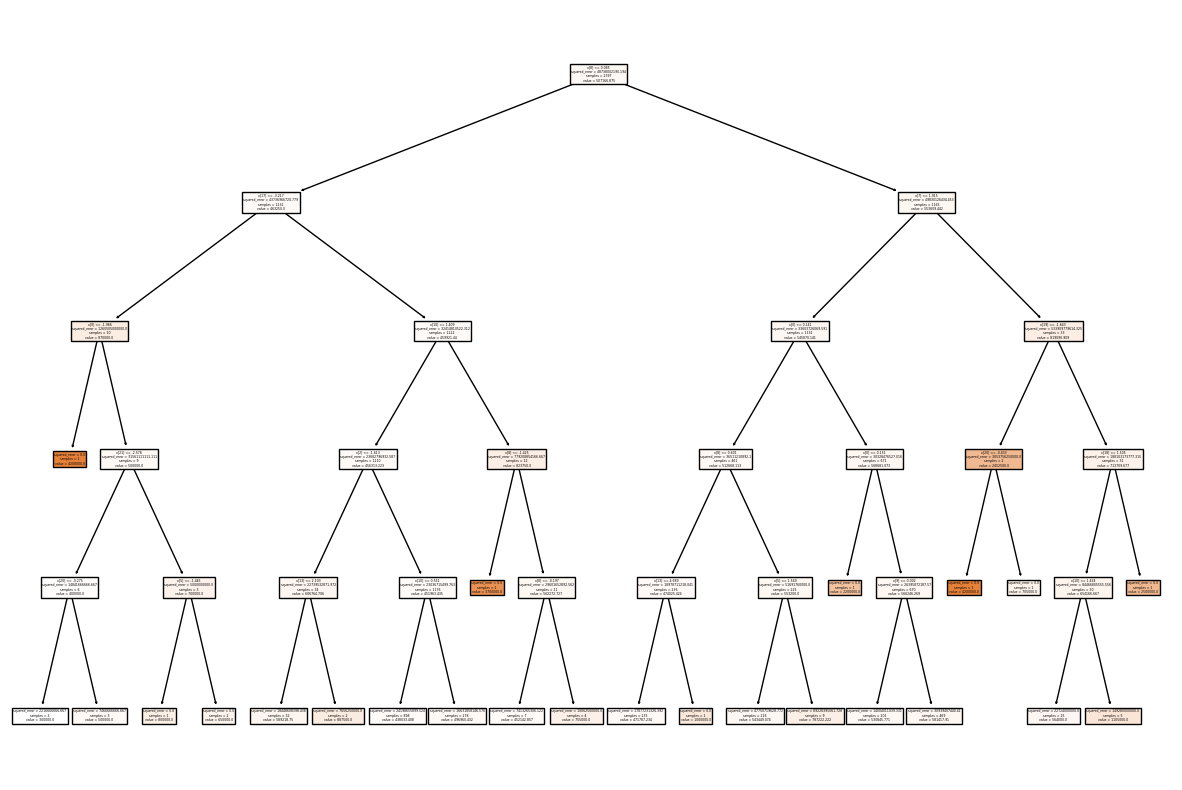

In [153]:
# Fitting decision tree with max_depth=5
dt=DecisionTreeRegressor(max_depth=5)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
dt_score=r2_score(y_test,y_pred_dt)
print("R2 score of Decision Tree with max_depth=5 is ",round(dt_score,3)," or ",round(dt_score,3)*100,"%")
# calculating rmse of decision tree
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("RMSE of Decision Tree with max_depth=5 is ",rmse)
# visualizing decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)
plt.show()

### 4 - Random Forest

In [155]:
# implementing random forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
rf_score=r2_score(y_test,y_pred_rf)
print("R2 score of Random Forest is ",round(rf_score,3)," or ",round(rf_score,3)*100,"%")
# calculating rmse of random forest
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE of Random Forest is ",rmse)


R2 score of Random Forest is  0.171  or  17.1 %
RMSE of Random Forest is  158696.00817075814


#### 5 - Gradient Boosting

R2 score of Gradient Boosting is  0.124  or  12.4 %
RMSE of Gradient Boosting is  163140.70478833845


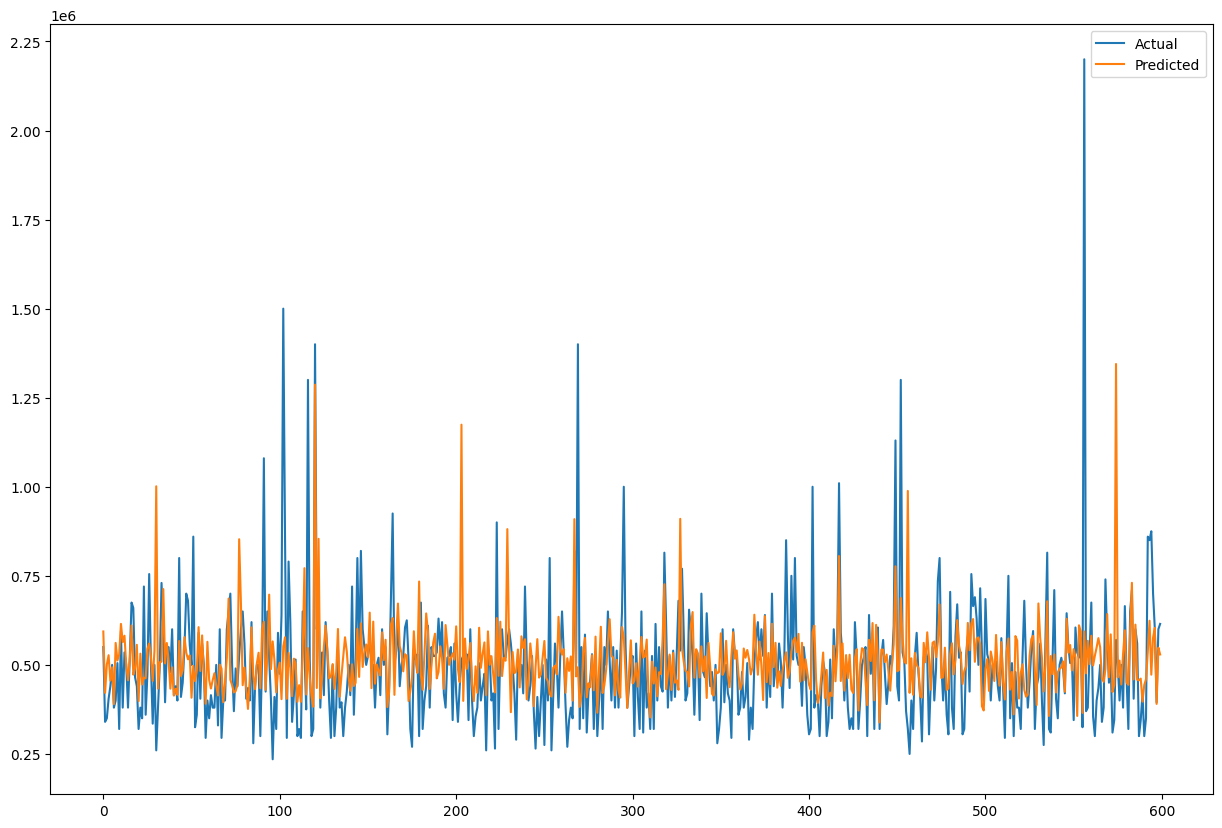

In [156]:
# implementing gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred_gb=gb.predict(x_test)
gb_score=r2_score(y_test,y_pred_gb)
print("R2 score of Gradient Boosting is ",round(gb_score,3)," or ",round(gb_score,3)*100,"%")
# calculating rmse of gradient boosting
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print("RMSE of Gradient Boosting is ",rmse)\
# visualizing gradient boosting
plt.figure(figsize=(15,10))
plt.plot(y_test.values,label='Actual')
plt.plot(y_pred_gb,label='Predicted')
plt.legend()
plt.show()


#### 6 - Huber Regressor

In [152]:
# implementing huber regressor
from sklearn.linear_model import HuberRegressor
hr=HuberRegressor()
hr.fit(x_train,y_train)
y_pred_hr=hr.predict(x_test)
hr_score=r2_score(y_test,y_pred_hr)
print("R2 score of Huber Regressor is ",round(hr_score,3)," or ",round(hr_score,3)*100,"%")
# calculating rmse of huber regressor
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_hr))   
print("RMSE of Huber Regressor is ",rmse)

R2 score of Huber Regressor is  0.219  or  21.9 %
RMSE of Huber Regressor is  153991.98719303886
